In [1]:
#from mpl_toolkits.axes_grid1 import host_subplot
#import mpl_toolkits.axisartist as AA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
data=pd.read_excel('cavity2022.xlsx')

In [3]:
data.columns

Index(['cellnumber', 'X-coor [m]', 'Y-coor [m]', 'X-vel[m/s]', 'Y-vel[m/s]'], dtype='object')

In [4]:
Cell=data['cellnumber']
x_coor=data['X-coor [m]']
y_coor=data['Y-coor [m]']
Vx=data['X-vel[m/s]']
Vy=data['Y-vel[m/s]']

In [5]:
#Sea w la magnitud resultante de la velocidad, creamos la matriz:
u= np.zeros((100,100))
v= np.zeros((100,100))

## ATENTION

### La convención de Python para matrices es:

$$w[j,i]$$
#### Donde la j avanza por el eje y, la i avanza por el eje x

### Anteriormente, ya se leyeron los datos de velocidad en
$$Vx=data['X-vel[m/s]']$$
$$Vy=data['Y-vel[m/s]']$$

#### Velocidades que se llevarán a una matriz 100x100, deparando la velucidad en X y Y

<IPython.core.display.Javascript object>


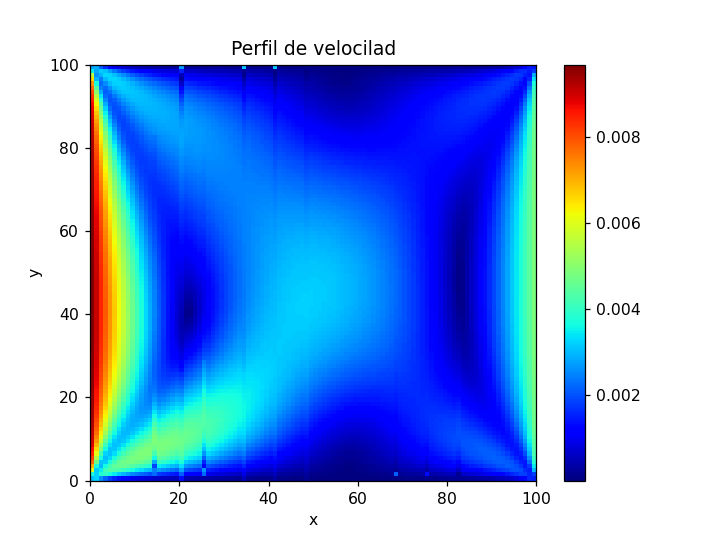

Velocidad mínima:  1.8090051779455691e-06 [m/s]
Velocidad máxima:  0.009692660533030374 [m/s]


In [6]:
count=0
for i in range(0, 100, 1):
    for j in range(0, 100, 1):
        u[j,i]=Vx[count]
        v[j,i]=Vy[count]
        count=count+1

#w[10,40]=0.1      

#CODIGO PARAGRAFICAR
plt.title(f"Perfil de velocilad")
plt.xlabel("x")
plt.ylabel("y")

plt.pcolormesh((u**2+v**2)**0.5, cmap=plt.cm.jet, vmin=np.min((u**2+v**2)**0.5), vmax=np.max((u**2+v**2)**0.5))
plt.colorbar()
print("Velocidad mínima: ",np.min((u**2+v**2)**0.5), "[m/s]")
print("Velocidad máxima: ",np.max((u**2+v**2)**0.5), "[m/s]")

In [7]:
u[0,0]

0.0008092214703000001

<IPython.core.display.Javascript object>


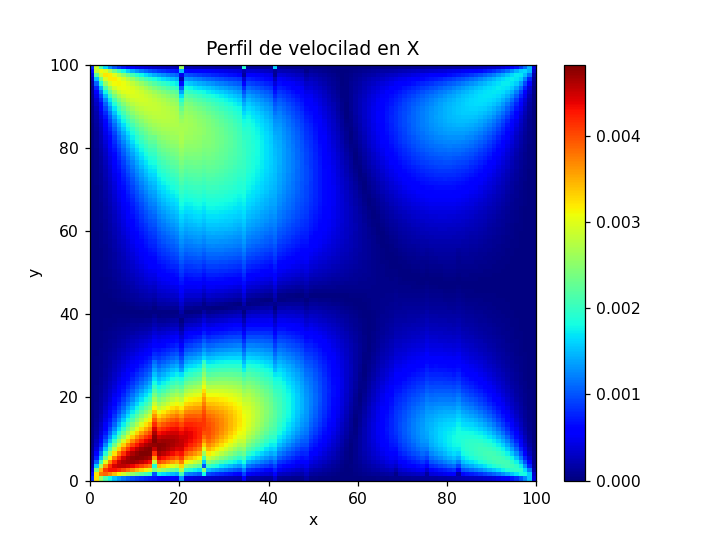

Velocidad mínima:  -0.00321789505 [m/s]
Velocidad máxima:  0.004826264922 [m/s]


In [8]:
#CODIGO PARAGRAFICAR VELOCIDAD EN X
plt.title(f"Perfil de velocilad en X")
plt.xlabel("x")
plt.ylabel("y")

plt.pcolormesh((u**2)**0.5, cmap=plt.cm.jet, vmin=0, vmax=np.max(u))
plt.colorbar()
print("Velocidad mínima: ",np.min(u), "[m/s]")
print("Velocidad máxima: ",np.max(u), "[m/s]")

<IPython.core.display.Javascript object>


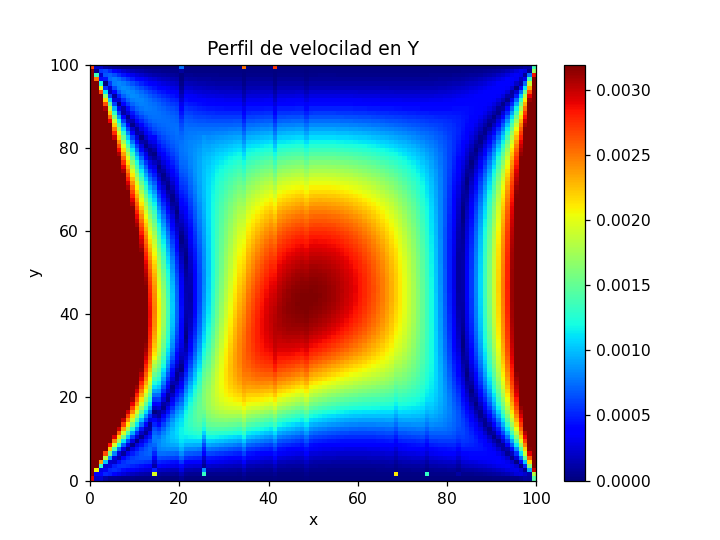

Velocidad mínima:  -0.009692660533 [m/s]
Velocidad máxima:  0.00319071603 [m/s]


In [9]:
#CODIGO PARAGRAFICAR VELOCIDAD EN Y
plt.title(f"Perfil de velocilad en Y")
plt.xlabel("x")
plt.ylabel("y")
plt.pcolormesh((v**2)**0.5, cmap=plt.cm.jet, vmin=0, vmax=np.max(v))
plt.colorbar()
print("Velocidad mínima: ",np.min(v), "[m/s]")
print("Velocidad máxima: ",np.max(v), "[m/s]")

In [10]:
#Datos de velocidad e emperatura de inicio.
V_izq=-0.01 #[m/s]
V_der=-0.005 #[m/s]

T_ini=300 #[K] T_ambiente

#TEMPERATURA EN PAREDES:
Tpmovil=447 #Temperatura de pared móvil [K] (las laterales).
Tpinmovil=350 #Temperatura de pared inmóvil [K].

L=0.1 #[m] Longitud de cada lado del recipiente cuadrado[m].

C=100; #Subdivisiones (igual en el eje x y en el eje y ).
delta=L/C; #Delta [m].

rho=1.225 #[kg/m3]densidad del aire a condiciones estándar 300[K].
Alpha=2.141*(10**(-5))*rho; #Difusividad térmica [m^2/s].
D=Alpha/delta; #Relación de la difusividad térmica con el delta de divisiones

In [11]:
D

0.026227250000000004

In [12]:
u[99,99]

0.0003967734228

In [26]:
# Se crea una matriz 100x100xn con los valores iniciales 300[K].
#Número máximo de iteraciones n:
n=15000
Tp=T_ini*np.ones((n,100,100))

In [28]:
for k in range(1, n, 1):
    for j in range(0, 100, 1):
        for i in range(0, 100, 1):
            ## NODO INFERIOR IZQUIERDO
            if i==0 and j==0:
                Ue=(u[j,i]+u[j,i+1])/2
                Fe=Ue*rho
                Uw=0
                Fw=Uw*rho
                Vn=(v[j,i]+v[j+1,i])/2
                Fn=Vn*rho
                Vs= 0
                Fs=Vs*rho
                Te=Tp[k-1,j,i+1]
                Tw=Tpmovil;Tn=Tp[k-1,j+1,i];Ts=Tpinmovil
            # NODO INFERIOR DERECHO %%
            if i==99 and j==0:
                Ue=0
                Fe=Ue*rho
                Uw=(u[j,i]+u[j,i-1])/2
                Fw=Uw*rho
                Vn=(v[j,i]+v[j+1,i])/2
                Fn=Vn*rho
                Vs= 0
                Fs=Vs*rho
                Te=Tpmovil
                Tw=Tp[k-1,j,i-1] ##########
                Tn=Tp[k-1,j+1,i]
                Ts=Tpinmovil
            ##3 NODO SUPERIOR IZQUIERDO
            if i==0 and j==99:
                Ue=(u[j,i]+u[j,i+1])/2
                Fe=Ue*rho
                Uw=0
                Fw=Uw*rho
                Vn= 0;Fn=Vn*rho
                Vs= (v[j,i]+v[j-1,i])/2
                Fs=Vs*rho
                Te=Tp[k-1,j,i+1]
                Tw=Tpmovil
                Tn=Tpinmovil
                Ts=Tp[k-1,j-1,i]
            #4 NODO SUPERIOR DERECHO
            if i==99 and j==99:
                Ue=0
                Fe=Ue*rho
                Uw=(u[j,i]+u[j,i-1])
                Fw=Uw*rho
                Vn=0;Fn=Vn*rho;Vs= 0
                Fs=Vs*rho
                Te=Tpmovil;
                Tw=Tp[k-1,j,i-1] #############
                Tn=Tpinmovil
                Ts=Tp[k-1,j-1,i]
            #5 NODOS INFERIORES CENTRALES
            if 0<i<99 and j==0:
                Ue=(u[j,i]+u[j,i+1])/2;Fe=Ue*rho
                Uw=(u[j,i]+u[j,i-1])/2;Fw=Uw*rho
                Vn=(v[j,i]+v[j+1,i])/2
                Fn=Vn*rho
                Vs=0
                Fs=Vs*rho
                Te=Tp[k-1,j,i+1]
                Tw=Tp[k-1,j,i-1] ########
                Tn=Tp[k-1,j+1,i]
                Ts=Tpinmovil
            #6 NODOS SUPERIORES CENTRALES
            if 0<i<99 and j==99:
                Ue=(u[j,i]+u[j,i+1])/2
                Fe=Ue*rho
                Uw=(u[j,i]+u[j,i-1])/2
                Fw=Uw*rho
                Vn=0
                Fn=-Vn*rho
                Vs=(v[j,i]+v[j-1,i])/2;Fs=Vs*rho
                Te=Tp[k-1,j,i+1]
                Tw=Tp[k-1,j,i-1] ######
                Tn=Tpinmovil
                Ts=Tp[k-1,j-1,i]
            #7 NODOS CENTRALES IZQUIERDOS
            if 0<j<99 and i==0:
                Ue=(u[j,i]+u[j,i+1])/2
                Fe=Ue*rho
                Uw=0
                Fw=Uw*rho
                Vn=(v[j,i]+v[j+1,i])/2
                Fn=Vn*rho
                Vs=(v[j,i]+v[j-1,i])/2;
                Fs=Vs*rho
                Te=Tp[k-1,j,i+1]
                Tw=Tpmovil
                Tn=Tp[k-1,j+1,i]
                Ts=Tp[k-1,j-1,i]
            #8 NODOS CENTRALES DERECHOS
            if 0<j<99 and i==99:
                Ue=0
                Fe=Ue*rho
                Uw=(u[j,i]+u[j,i-1])/2;Fw=Uw*rho
                Vn=(v[j,i]+v[j+1,i])/2;Fn=Vn*rho
                Vs=(v[j,i]+v[j-1,i])/2;
                Fs=Vs*rho
                Te=Tpmovil
                Tw=Tp[k-1,j,i-1] ###########
                Tn=Tp[k-1,j+1,i] 
                Ts=Tp[k-1,j-1,i]
            #9 ECUACION PARA NODOS EN EL MEDIO: 0<i<99 and 0<j<99
            if 0<i<99 and 0<j<99:
                Ue=(u[j,i]+u[j,i+1])/2
                Fe=Ue*rho
                Uw=(u[j,i]+u[j,i-1])/2
                Fw=Uw*rho
                Vn=(v[j,i]+v[j+1,i])/2
                Fn=Vn*rho
                Vs=(v[j,i]+v[j-1,i])/2
                Fs=Vs*rho
                Te=Tp[k-1,j,i+1]
                Tw=Tp[k-1,j,i-1]
                Tn=Tp[k-1,j+1,i]
                Ts=Tp[k-1,j-1,i]
                
            # ECUACIÓN GENERAL
            Tp[k,j,i]=(((D+(Fw/2))*Tw)+((D-(Fn/2))*Tn)+((D-(Fe/2))*Te)+((D+(Fs/2))*Ts))/((D-(Fw/2))+(D+(Fn/2))+(D+(Fe/2))+(D-(Fs/2)))
            #Convergetia criteria
    conv=np.max(Tp[k]-Tp[k-1])
    if conv<0.00005:
        print('Numero de iteraciones: ', k+1 )
        print('Convergencia : ', round(conv,6))
        print( "Temperatura máxima es de: " , np.max(Tp[k]) , "m/s")
    if k == n-1: #Criterio de convergencia NO alanzado
        print('Numero de iteraciones: ', k+1 )
        print('La convergencia no alcanzó valor estimado: ')
        print('Convergencia alcanzada: ', round(conv,6))
        print( "Velocidad máxima es de: " , np.max(u[k]) , "[K]")
        break

Numero de iteraciones:  10990
Convergencia :  5e-05
Temperatura máxima es de:  445.5022506883844 m/s


In [42]:
if conv<0.00005:
    print('Numero de iteraciones: ', k+1 )
    print('Convergencia : ', round(conv,6))
    print( "Temperatura máxima es de: " , np.max(Tp[k]) , "[K]")
if k == n-1: #Criterio de convergencia NO alanzado
    print('Numero de iteraciones: ', k+1 )
    print('La convergencia no alcanzó valor estimado: ')
    print('Convergencia alcanzada: ', round(conv,6))
    print( "Velocidad máxima es de: " , np.max(u[k]) , "[K]")

Numero de iteraciones:  10990
Convergencia :  5e-05
Temperatura máxima es de:  445.5022506883844 [K]


## Result

<IPython.core.display.Javascript object>


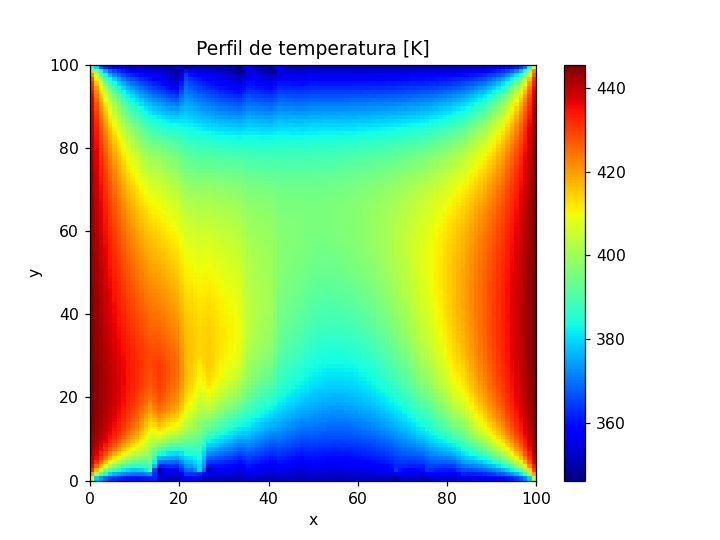

Temperatura mínima:  346.2111386887374 [K]
Temperatura máxima:  445.5022506883844 [K]


In [43]:
#CODIGO PARAGRAFICAR
plt.title(f"Perfil de temperatura [K]")
plt.xlabel("x")
plt.ylabel("y")
k=10989
plt.pcolormesh(Tp[k], cmap=plt.cm.jet, vmin=np.min(Tp[k]), vmax=np.max(Tp[k]))
plt.colorbar()

print("Temperatura mínima: ",np.min(Tp[k]), "[K]")
print("Temperatura máxima: ",np.max(Tp[k]), "[K]")

# Next, a brief animation of secuence

<IPython.core.display.Javascript object>


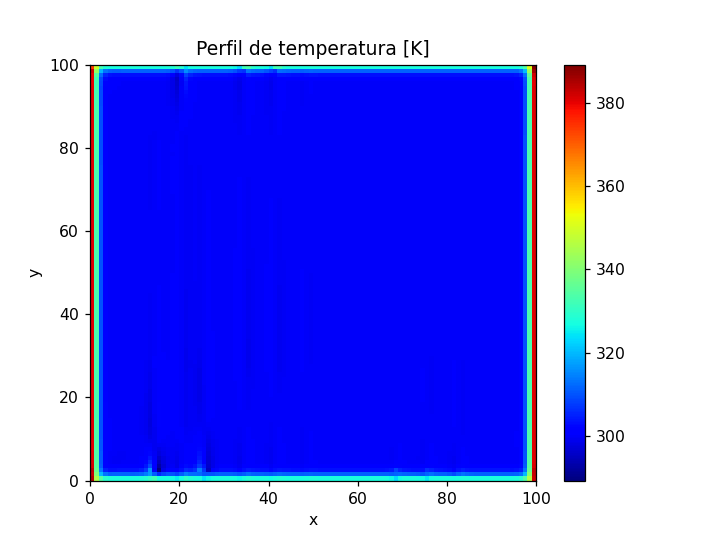

Temperatura mínima:  289.28369611881203 [K]
Temperatura máxima:  389.1238952331095 [K]


In [44]:
#CODIGO PARAGRAFICAR
plt.title(f"Perfil de temperatura [K]")
plt.xlabel("x")
plt.ylabel("y")
k=5
plt.pcolormesh(Tp[k], cmap=plt.cm.jet, vmin=np.min(Tp[k]), vmax=np.max(Tp[k]))
plt.colorbar()

print("Temperatura mínima: ",np.min(Tp[k]), "[K]")
print("Temperatura máxima: ",np.max(Tp[k]), "[K]")

<IPython.core.display.Javascript object>


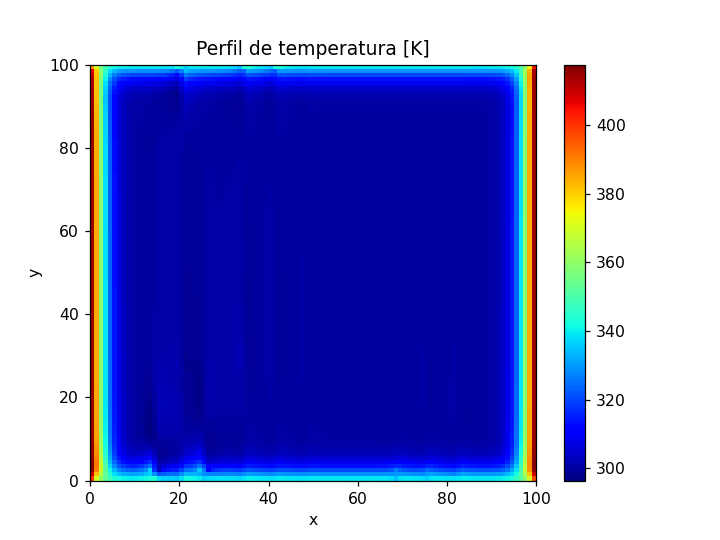

Temperatura mínima:  296.4190009389664 [K]
Temperatura máxima:  417.4752017211215 [K]


In [45]:
#CODIGO PARAGRAFICAR
plt.title(f"Perfil de temperatura [K]")
plt.xlabel("x")
plt.ylabel("y")
k=25
plt.pcolormesh(Tp[k], cmap=plt.cm.jet, vmin=np.min(Tp[k]), vmax=np.max(Tp[k]))
plt.colorbar()

print("Temperatura mínima: ",np.min(Tp[k]), "[K]")
print("Temperatura máxima: ",np.max(Tp[k]), "[K]")

<IPython.core.display.Javascript object>


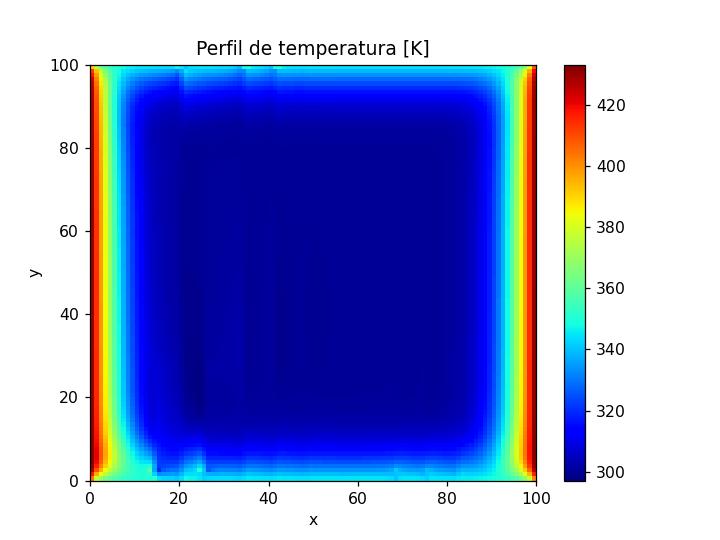

Temperatura mínima:  297.0912963839718 [K]
Temperatura máxima:  433.1770548107233 [K]


In [46]:
#CODIGO PARAGRAFICAR
plt.title(f"Perfil de temperatura [K]")
plt.xlabel("x")
plt.ylabel("y")
k=100
plt.pcolormesh(Tp[k], cmap=plt.cm.jet, vmin=np.min(Tp[k]), vmax=np.max(Tp[k]))
plt.colorbar()

print("Temperatura mínima: ",np.min(Tp[k]), "[K]")
print("Temperatura máxima: ",np.max(Tp[k]), "[K]")

<IPython.core.display.Javascript object>


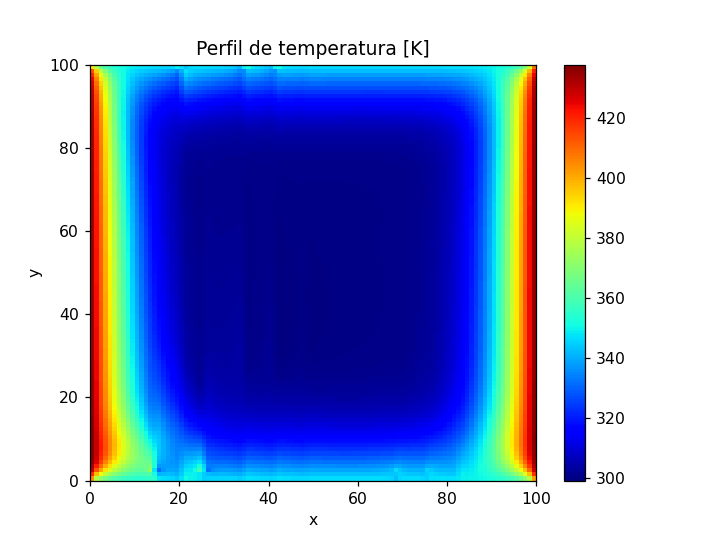

Temperatura mínima:  299.0015952177839 [K]
Temperatura máxima:  437.8039020555698 [K]


In [133]:
#CODIGO PARAGRAFICAR
plt.title(f"Perfil de temperatura [K]")
plt.xlabel("x")
plt.ylabel("y")
k=200
plt.pcolormesh(Tp[k], cmap=plt.cm.jet, vmin=np.min(Tp[k]), vmax=np.max(Tp[k]))
plt.colorbar()

print("Temperatura mínima: ",np.min(Tp[k]), "[K]")
print("Temperatura máxima: ",np.max(Tp[k]), "[K]")

<IPython.core.display.Javascript object>


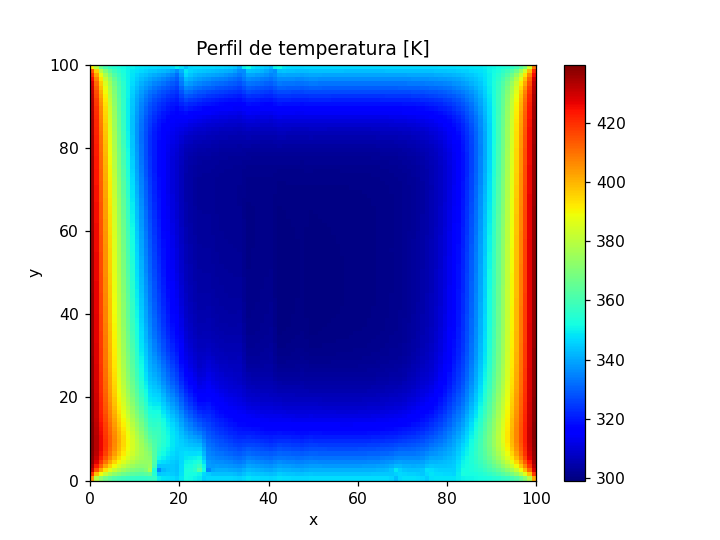

Temperatura mínima:  299.1787991436671 [K]
Temperatura máxima:  439.4785602573429 [K]


In [47]:
#CODIGO PARAGRAFICAR
plt.title(f"Perfil de temperatura [K]")
plt.xlabel("x")
plt.ylabel("y")
k=280
plt.pcolormesh(Tp[k], cmap=plt.cm.jet, vmin=np.min(Tp[k]), vmax=np.max(Tp[k]))
plt.colorbar()

print("Temperatura mínima: ",np.min(Tp[k]), "[K]")
print("Temperatura máxima: ",np.max(Tp[k]), "[K]")

<IPython.core.display.Javascript object>


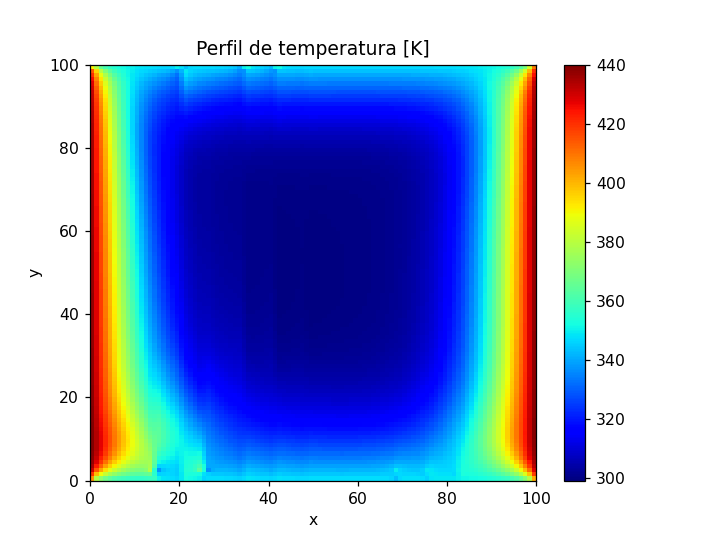

Temperatura mínima:  299.23686371203854 [K]
Temperatura máxima:  440.0545094840288 [K]


In [48]:
#CODIGO PARAGRAFICAR
plt.title(f"Perfil de temperatura [K]")
plt.xlabel("x")
plt.ylabel("y")
k=320
plt.pcolormesh(Tp[k], cmap=plt.cm.jet, vmin=np.min(Tp[k]), vmax=np.max(Tp[k]))
plt.colorbar()

print("Temperatura mínima: ",np.min(Tp[k]), "[K]")
print("Temperatura máxima: ",np.max(Tp[k]), "[K]")

<IPython.core.display.Javascript object>


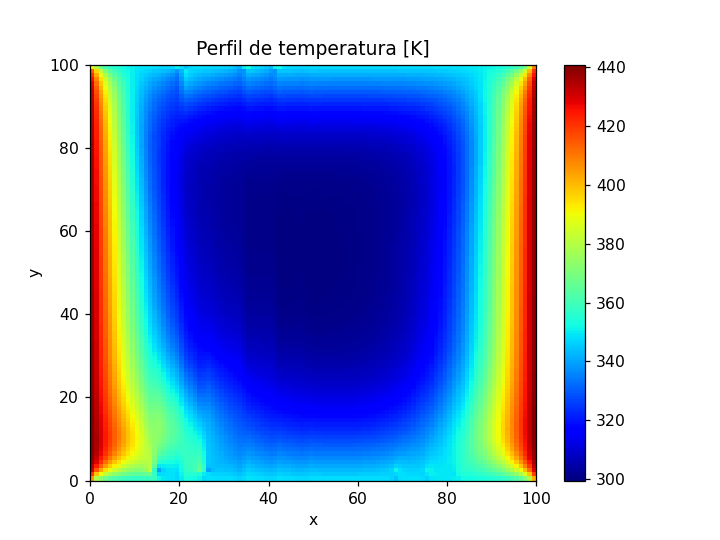

Temperatura mínima:  299.42924276973815 [K]
Temperatura máxima:  440.9127373674017 [K]


In [49]:
#CODIGO PARAGRAFICAR
plt.title(f"Perfil de temperatura [K]")
plt.xlabel("x")
plt.ylabel("y")
k=400
plt.pcolormesh(Tp[k], cmap=plt.cm.jet, vmin=np.min(Tp[k]), vmax=np.max(Tp[k]))
plt.colorbar()

print("Temperatura mínima: ",np.min(Tp[k]), "[K]")
print("Temperatura máxima: ",np.max(Tp[k]), "[K]")

<IPython.core.display.Javascript object>


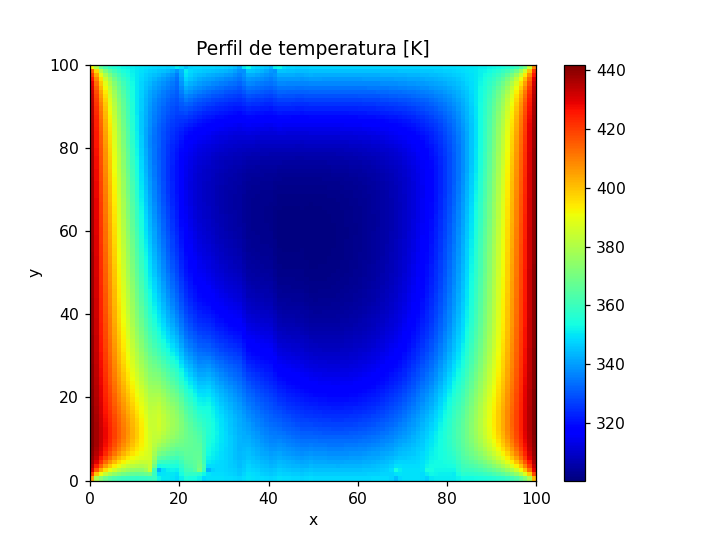

Temperatura mínima:  300.32105721383425 [K]
Temperatura máxima:  441.9264485175708 [K]


In [135]:
#CODIGO PARAGRAFICAR
plt.title(f"Perfil de temperatura [K]")
plt.xlabel("x")
plt.ylabel("y")
k=550
plt.pcolormesh(Tp[k], cmap=plt.cm.jet, vmin=np.min(Tp[k]), vmax=np.max(Tp[k]))
plt.colorbar()

print("Temperatura mínima: ",np.min(Tp[k]), "[K]")
print("Temperatura máxima: ",np.max(Tp[k]), "[K]")

<IPython.core.display.Javascript object>


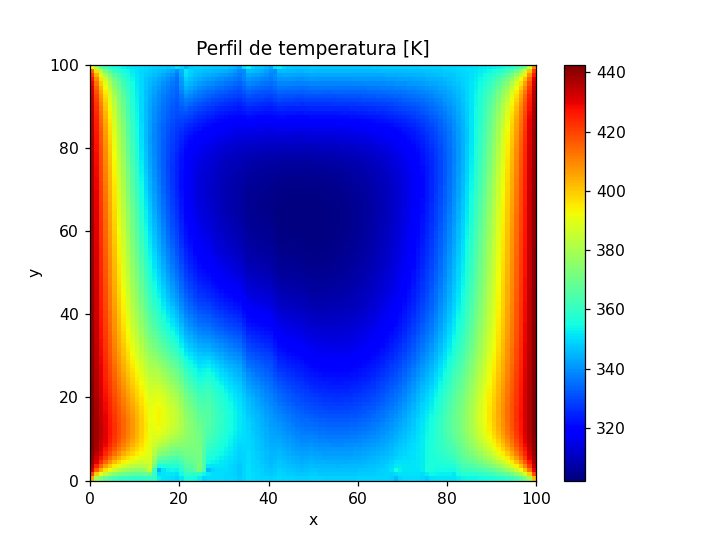

Temperatura mínima:  302.2314118236953 [K]
Temperatura máxima:  442.545594973985 [K]


In [136]:
#CODIGO PARAGRAFICAR
plt.title(f"Perfil de temperatura [K]")
plt.xlabel("x")
plt.ylabel("y")
k=700
plt.pcolormesh(Tp[k], cmap=plt.cm.jet, vmin=np.min(Tp[k]), vmax=np.max(Tp[k]))
plt.colorbar()

print("Temperatura mínima: ",np.min(Tp[k]), "[K]")
print("Temperatura máxima: ",np.max(Tp[k]), "[K]")

<IPython.core.display.Javascript object>


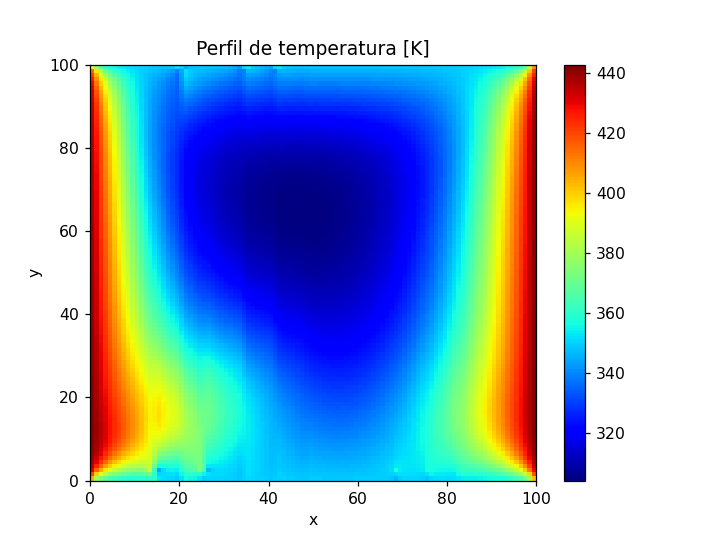

Temperatura mínima:  304.1157254099276 [K]
Temperatura máxima:  442.8435285384238 [K]


In [137]:
#CODIGO PARAGRAFICAR
plt.title(f"Perfil de temperatura [K]")
plt.xlabel("x")
plt.ylabel("y")
k=800
plt.pcolormesh(Tp[k], cmap=plt.cm.jet, vmin=np.min(Tp[k]), vmax=np.max(Tp[k]))
plt.colorbar()

print("Temperatura mínima: ",np.min(Tp[k]), "[K]")
print("Temperatura máxima: ",np.max(Tp[k]), "[K]")

<IPython.core.display.Javascript object>


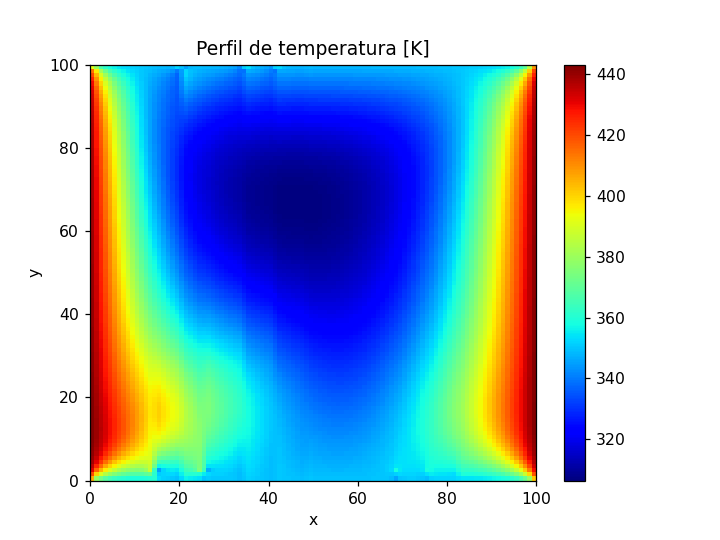

Temperatura mínima:  306.413665088009 [K]
Temperatura máxima:  443.074670300558 [K]


In [138]:
#CODIGO PARAGRAFICAR
plt.title(f"Perfil de temperatura [K]")
plt.xlabel("x")
plt.ylabel("y")
k=900
plt.pcolormesh(Tp[k], cmap=plt.cm.jet, vmin=np.min(Tp[k]), vmax=np.max(Tp[k]))
plt.colorbar()

print("Temperatura mínima: ",np.min(Tp[k]), "[K]")
print("Temperatura máxima: ",np.max(Tp[k]), "[K]")

<IPython.core.display.Javascript object>


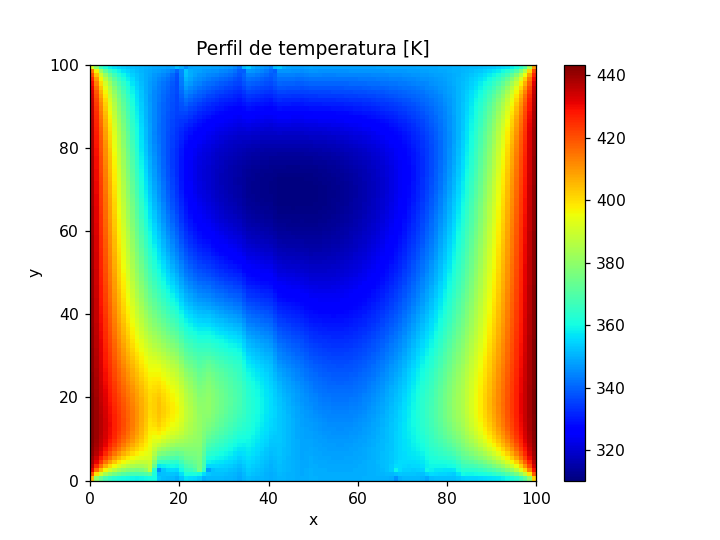

Temperatura mínima:  310.33479191599497 [K]
Temperatura máxima:  443.3567149254995 [K]


In [50]:
#CODIGO PARAGRAFICAR
plt.title(f"Perfil de temperatura [K]")
plt.xlabel("x")
plt.ylabel("y")
k=1050
plt.pcolormesh(Tp[k], cmap=plt.cm.jet, vmin=np.min(Tp[k]), vmax=np.max(Tp[k]))
plt.colorbar()

print("Temperatura mínima: ",np.min(Tp[k]), "[K]")
print("Temperatura máxima: ",np.max(Tp[k]), "[K]")

<IPython.core.display.Javascript object>


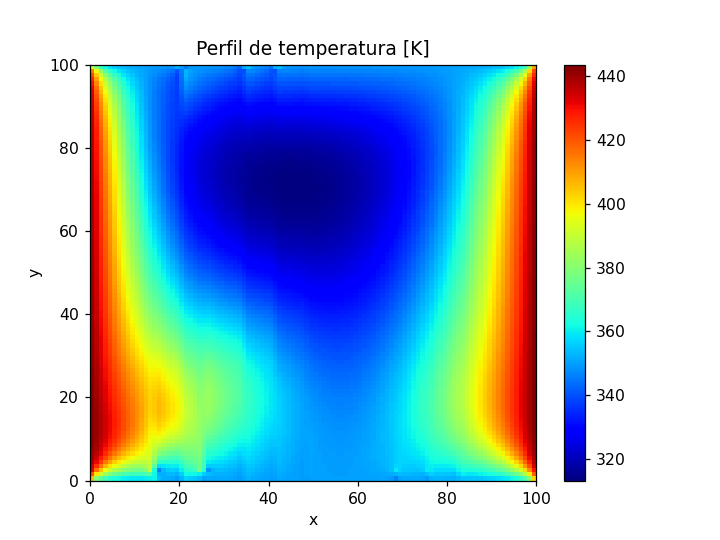

Temperatura mínima:  313.24618969638965 [K]
Temperatura máxima:  443.5047631554439 [K]


In [51]:
#CODIGO PARAGRAFICAR
plt.title(f"Perfil de temperatura [K]")
plt.xlabel("x")
plt.ylabel("y")
k=1150
plt.pcolormesh(Tp[k], cmap=plt.cm.jet, vmin=np.min(Tp[k]), vmax=np.max(Tp[k]))
plt.colorbar()

print("Temperatura mínima: ",np.min(Tp[k]), "[K]")
print("Temperatura máxima: ",np.max(Tp[k]), "[K]")

<IPython.core.display.Javascript object>


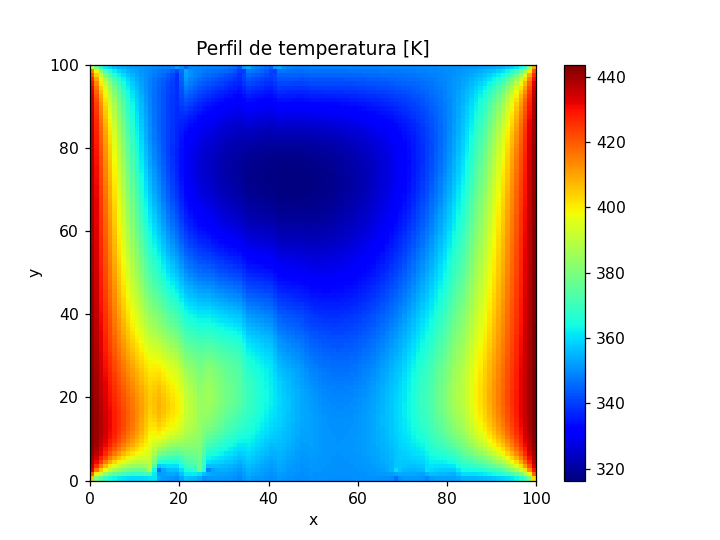

Temperatura mínima:  316.31536793189105 [K]
Temperatura máxima:  443.63283568963215 [K]


In [139]:
#CODIGO PARAGRAFICAR
plt.title(f"Perfil de temperatura [K]")
plt.xlabel("x")
plt.ylabel("y")
k=1250
plt.pcolormesh(Tp[k], cmap=plt.cm.jet, vmin=np.min(Tp[k]), vmax=np.max(Tp[k]))
plt.colorbar()

print("Temperatura mínima: ",np.min(Tp[k]), "[K]")
print("Temperatura máxima: ",np.max(Tp[k]), "[K]")

<IPython.core.display.Javascript object>


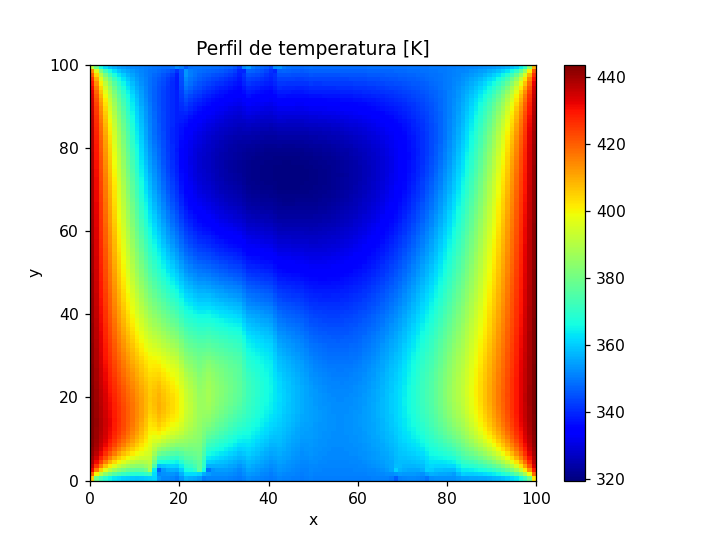

Temperatura mínima:  319.4640699408874 [K]
Temperatura máxima:  443.7487620305803 [K]


In [52]:
#CODIGO PARAGRAFICAR
plt.title(f"Perfil de temperatura [K]")
plt.xlabel("x")
plt.ylabel("y")
k=1350
plt.pcolormesh(Tp[k], cmap=plt.cm.jet, vmin=np.min(Tp[k]), vmax=np.max(Tp[k]))
plt.colorbar()

print("Temperatura mínima: ",np.min(Tp[k]), "[K]")
print("Temperatura máxima: ",np.max(Tp[k]), "[K]")

<IPython.core.display.Javascript object>


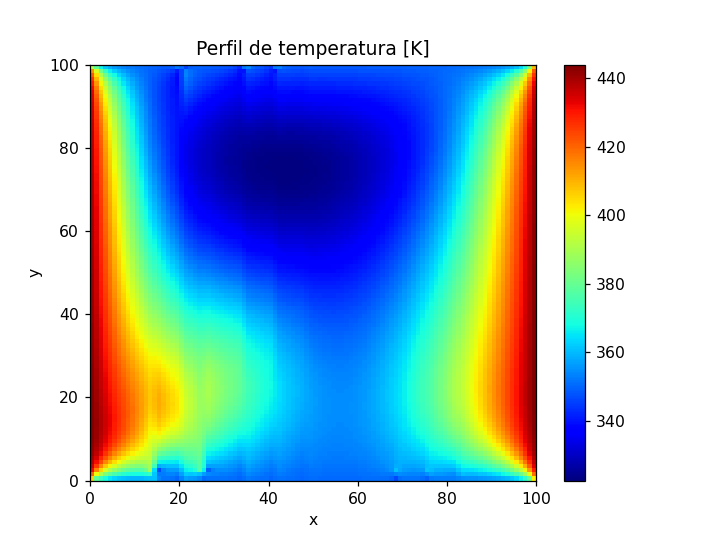

Temperatura mínima:  322.6511629028477 [K]
Temperatura máxima:  443.8505919081096 [K]


In [53]:
#CODIGO PARAGRAFICAR
plt.title(f"Perfil de temperatura [K]")
plt.xlabel("x")
plt.ylabel("y")
k=1450
plt.pcolormesh(Tp[k], cmap=plt.cm.jet, vmin=np.min(Tp[k]), vmax=np.max(Tp[k]))
plt.colorbar()

print("Temperatura mínima: ",np.min(Tp[k]), "[K]")
print("Temperatura máxima: ",np.max(Tp[k]), "[K]")

<IPython.core.display.Javascript object>


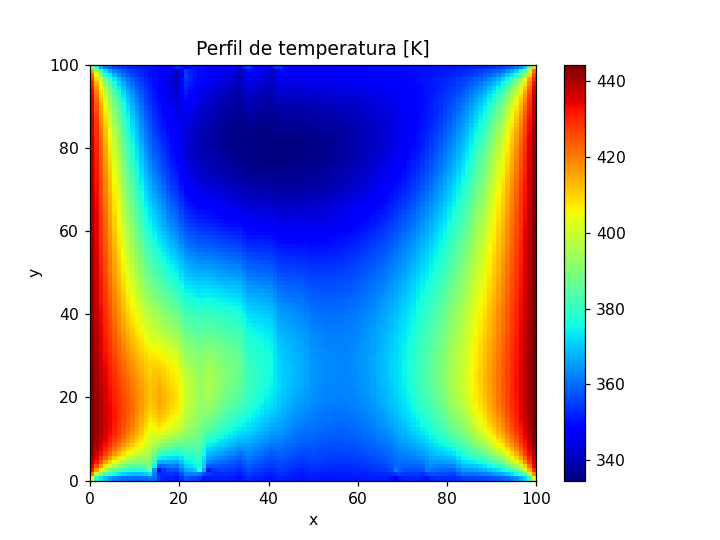

Temperatura mínima:  334.6949096588539 [K]
Temperatura máxima:  444.1785581187806 [K]


In [144]:
#CODIGO PARAGRAFICAR
plt.title(f"Perfil de temperatura [K]")
plt.xlabel("x")
plt.ylabel("y")
k=1850
plt.pcolormesh(Tp[k], cmap=plt.cm.jet, vmin=np.min(Tp[k]), vmax=np.max(Tp[k]))
plt.colorbar()

print("Temperatura mínima: ",np.min(Tp[k]), "[K]")
print("Temperatura máxima: ",np.max(Tp[k]), "[K]")

<IPython.core.display.Javascript object>


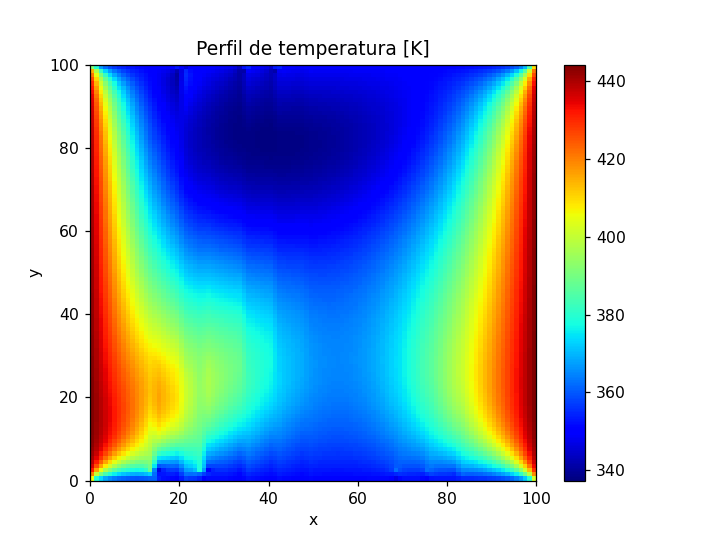

Temperatura mínima:  337.31422066327 [K]
Temperatura máxima:  444.24635667563774 [K]


In [54]:
#CODIGO PARAGRAFICAR
plt.title(f"Perfil de temperatura [K]")
plt.xlabel("x")
plt.ylabel("y")
k=1950
plt.pcolormesh(Tp[k], cmap=plt.cm.jet, vmin=np.min(Tp[k]), vmax=np.max(Tp[k]))
plt.colorbar()

print("Temperatura mínima: ",np.min(Tp[k]), "[K]")
print("Temperatura máxima: ",np.max(Tp[k]), "[K]")

<IPython.core.display.Javascript object>


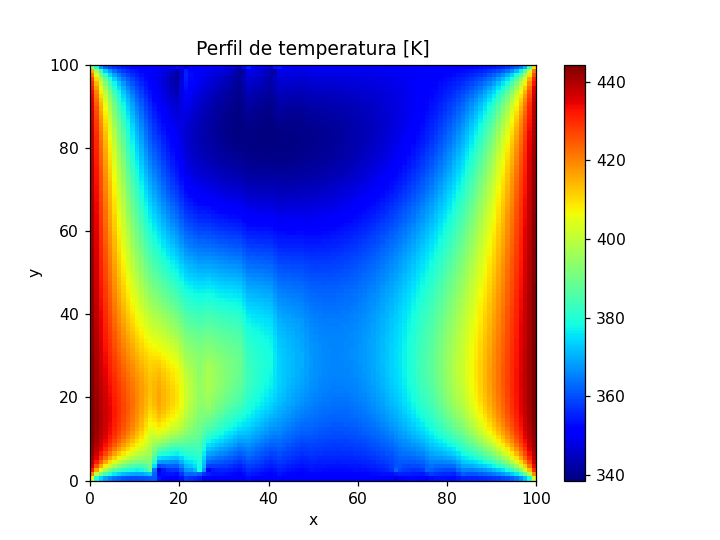

Temperatura mínima:  338.5565750619107 [K]
Temperatura máxima:  444.2784529287199 [K]


In [55]:
#CODIGO PARAGRAFICAR
plt.title(f"Perfil de temperatura [K]")
plt.xlabel("x")
plt.ylabel("y")
k=2000
plt.pcolormesh(Tp[k], cmap=plt.cm.jet, vmin=np.min(Tp[k]), vmax=np.max(Tp[k]))
plt.colorbar()

print("Temperatura mínima: ",np.min(Tp[k]), "[K]")
print("Temperatura máxima: ",np.max(Tp[k]), "[K]")

<IPython.core.display.Javascript object>


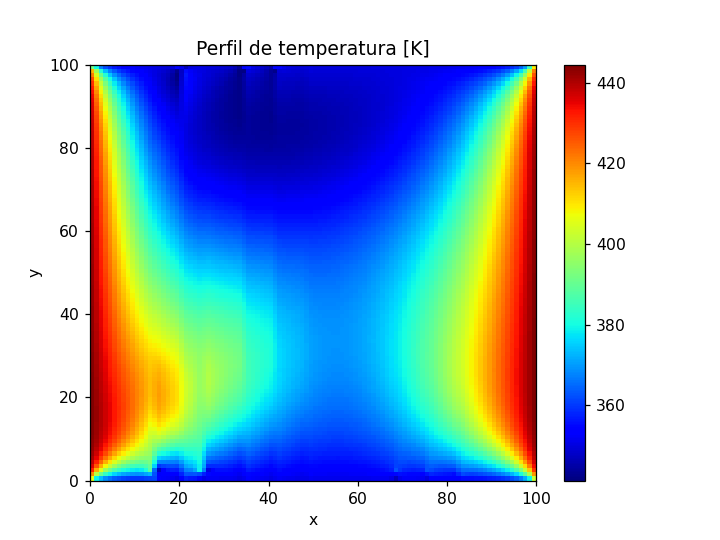

Temperatura mínima:  341.30106023557073 [K]
Temperatura máxima:  444.4042636057185 [K]


In [145]:
#CODIGO PARAGRAFICAR
plt.title(f"Perfil de temperatura [K]")
plt.xlabel("x")
plt.ylabel("y")
k=2200
plt.pcolormesh(Tp[k], cmap=plt.cm.jet, vmin=np.min(Tp[k]), vmax=np.max(Tp[k]))
plt.colorbar()

print("Temperatura mínima: ",np.min(Tp[k]), "[K]")
print("Temperatura máxima: ",np.max(Tp[k]), "[K]")

<IPython.core.display.Javascript object>


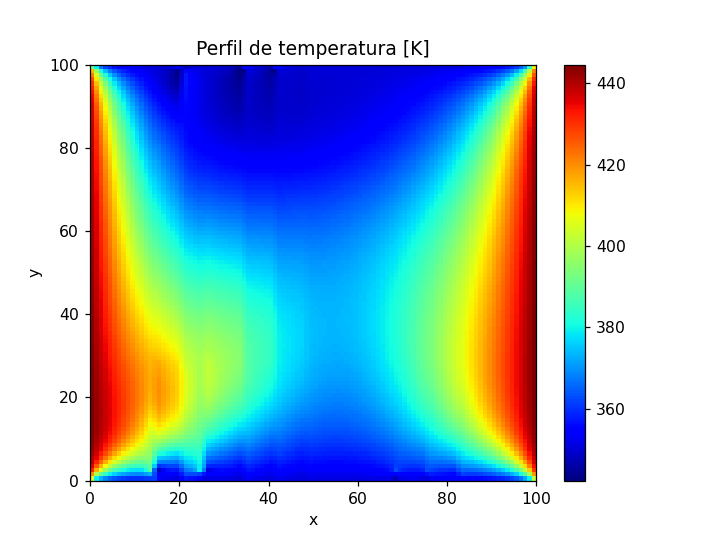

Temperatura mínima:  342.36366828553065 [K]
Temperatura máxima:  444.5694207502535 [K]


In [150]:
#CODIGO PARAGRAFICAR
plt.title(f"Perfil de temperatura [K]")
plt.xlabel("x")
plt.ylabel("y")
k=2500
plt.pcolormesh(Tp[k], cmap=plt.cm.jet, vmin=np.min(Tp[k]), vmax=np.max(Tp[k]))
plt.colorbar()

print("Temperatura mínima: ",np.min(Tp[k]), "[K]")
print("Temperatura máxima: ",np.max(Tp[k]), "[K]")

<IPython.core.display.Javascript object>


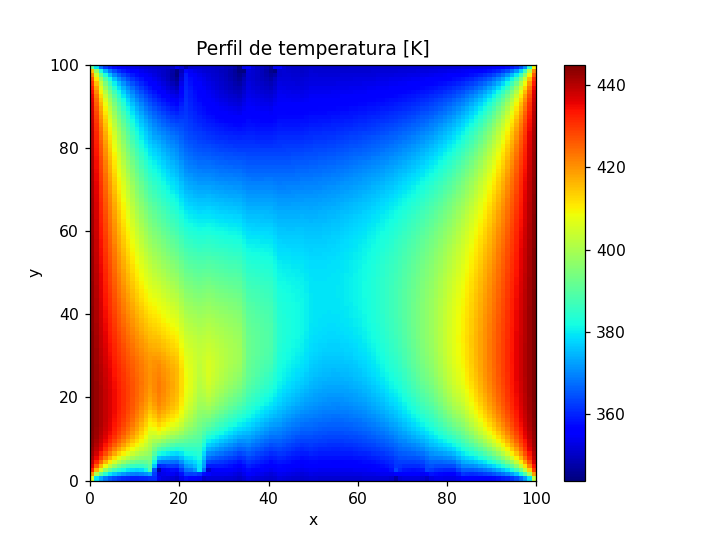

Temperatura mínima:  343.961489654588 [K]
Temperatura máxima:  444.8037442881801 [K]


In [151]:
#CODIGO PARAGRAFICAR
plt.title(f"Perfil de temperatura [K]")
plt.xlabel("x")
plt.ylabel("y")
k=3000
plt.pcolormesh(Tp[k], cmap=plt.cm.jet, vmin=np.min(Tp[k]), vmax=np.max(Tp[k]))
plt.colorbar()

print("Temperatura mínima: ",np.min(Tp[k]), "[K]")
print("Temperatura máxima: ",np.max(Tp[k]), "[K]")

<IPython.core.display.Javascript object>


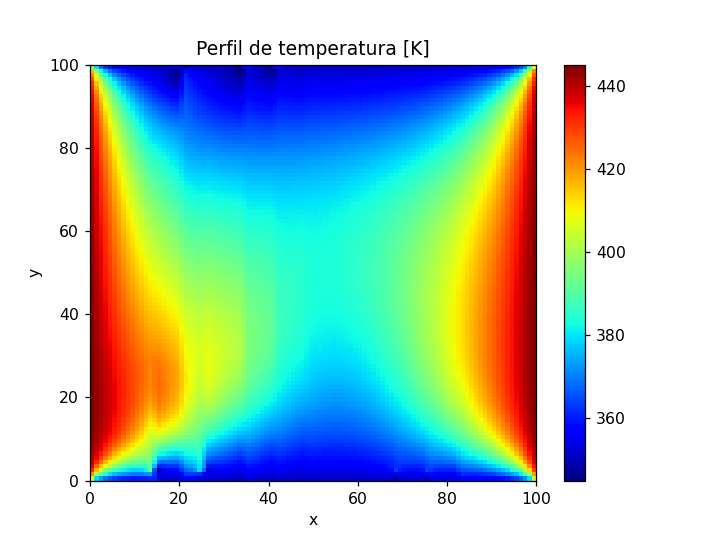

Temperatura mínima:  344.9224096990782 [K]
Temperatura máxima:  444.9903092741577 [K]


In [152]:
#CODIGO PARAGRAFICAR
plt.title(f"Perfil de temperatura [K]")
plt.xlabel("x")
plt.ylabel("y")
k=3500
plt.pcolormesh(Tp[k], cmap=plt.cm.jet, vmin=np.min(Tp[k]), vmax=np.max(Tp[k]))
plt.colorbar()

print("Temperatura mínima: ",np.min(Tp[k]), "[K]")
print("Temperatura máxima: ",np.max(Tp[k]), "[K]")

<IPython.core.display.Javascript object>


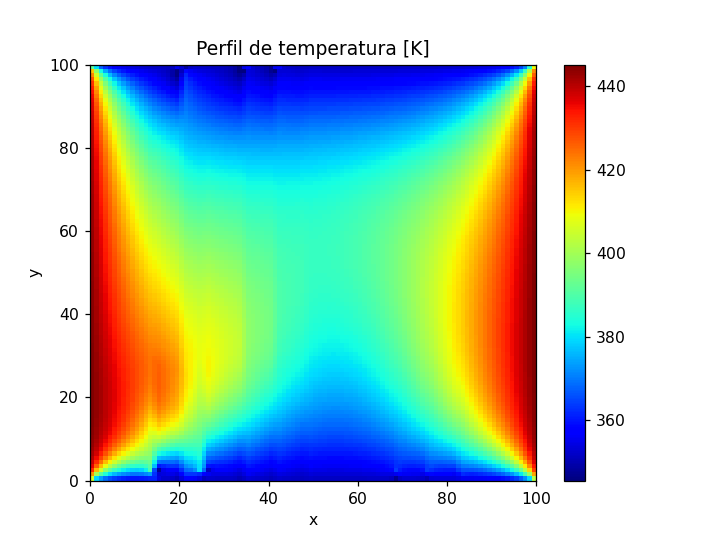

Temperatura mínima:  345.4686290670396 [K]
Temperatura máxima:  445.13415770940213 [K]


In [153]:
#CODIGO PARAGRAFICAR
plt.title(f"Perfil de temperatura [K]")
plt.xlabel("x")
plt.ylabel("y")
k=4000
plt.pcolormesh(Tp[k], cmap=plt.cm.jet, vmin=np.min(Tp[k]), vmax=np.max(Tp[k]))
plt.colorbar()

print("Temperatura mínima: ",np.min(Tp[k]), "[K]")
print("Temperatura máxima: ",np.max(Tp[k]), "[K]")

<IPython.core.display.Javascript object>


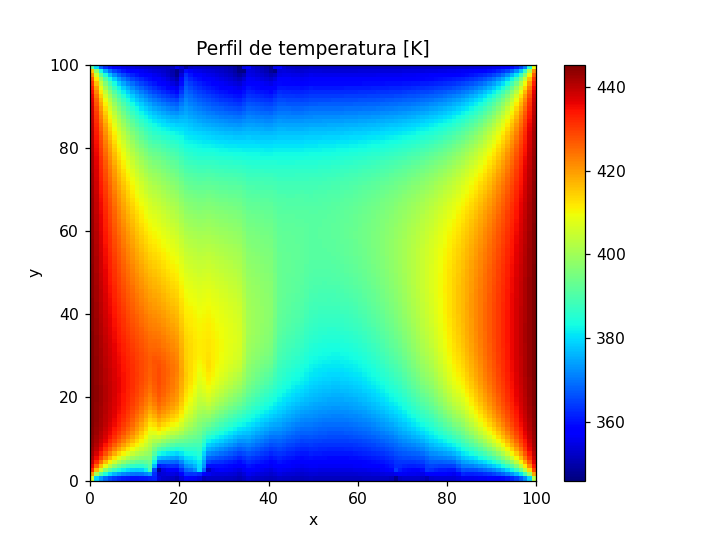

Temperatura mínima:  345.86396928077 [K]
Temperatura máxima:  445.3199592587081 [K]


In [154]:
#CODIGO PARAGRAFICAR
plt.title(f"Perfil de temperatura [K]")
plt.xlabel("x")
plt.ylabel("y")
k=5000
plt.pcolormesh(Tp[k], cmap=plt.cm.jet, vmin=np.min(Tp[k]), vmax=np.max(Tp[k]))
plt.colorbar()

print("Temperatura mínima: ",np.min(Tp[k]), "[K]")
print("Temperatura máxima: ",np.max(Tp[k]), "[K]")